# Objectives

1. Calculate Projected Regular Season Win/Loss
2. Calculate Projected Postseason Result
3. Project Points Against Unluckiness
4. Find out individual team volatility 

### Import Libraries

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### Import Data

In [210]:
data_2014 = pd.read_excel('C:/Users/mikes/Documents/Python Scripts/FF_owners/ATOAFFL_STATS_2014_2017.xlsx', sheetname='2014')
data_2014.name = '2014'
data_2015 = pd.read_excel('C:/Users/mikes/Documents/Python Scripts/FF_owners/ATOAFFL_STATS_2014_2017.xlsx', sheetname='2015')
data_2015.name = '2015'
data_2016 = pd.read_excel('C:/Users/mikes/Documents/Python Scripts/FF_owners/ATOAFFL_STATS_2014_2017.xlsx', sheetname='2016')
data_2016.name = '2016'
data_2017 = pd.read_excel('C:/Users/mikes/Documents/Python Scripts/FF_owners/ATOAFFL_STATS_2014_2017.xlsx', sheetname='2017')
data_2017.name = '2017'

### Clean dataframes

In [211]:
for df in [data_2014, data_2015, data_2016, data_2017]:
    #Calculate Regular Season Win PCT
    df.insert(1, 'Win_Pct', df['WINS'] / 13)
        
    pts_for_avg = df['POINTS FOR'].mean()
    pts_against_avg = df['POINTS AGAINST'].mean()
    df['Pts_For_Above_Avg'] = df['POINTS FOR'] - pts_for_avg
    df['Pts_Against_Below_Avg'] = pts_against_avg - df['POINTS AGAINST'] 
    df['Year'] = df.name

### Combining Dataframes

In [212]:
data = data_2014.append([data_2015, data_2016, data_2017])

### Avg. Pts_For Above Avg. 

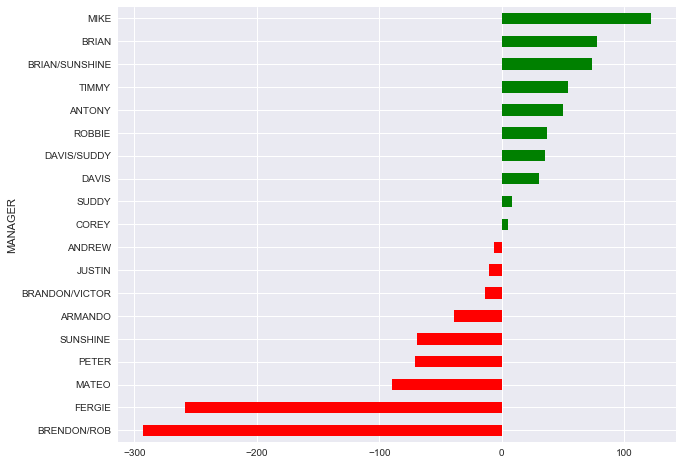

In [213]:
result = pd.DataFrame(data.groupby('MANAGER')['Pts_For_Above_Avg'].mean()).sort_values('Pts_For_Above_Avg')
#Plot values less than 0 as red, values greater than 0 as green
mask = (result >=0)
colors = np.array(['r']*(result.shape[0]))
colors[mask.values.flatten()] = 'g'

result['Pts_For_Above_Avg'].plot(kind='barh', color=tuple([colors]), figsize=(10, 8));

On average, I score the most points above the league season average. Suprisingly, teams containing commish round out the 2 and 3 spots. Conclusion, Mateo, Peter and Sunshine blow at FF.

### 3 Best Points_For_Above_Avg Seasons

In [214]:
data.sort_values('Pts_For_Above_Avg', ascending=False)[:3]

,MANAGER,Win_Pct,WINS,LOSSES,POINTS FOR,POINTS AGAINST,PF/G,PA/G,DIFF,REGULAR SEASON FINISH,RESULT,Pts_For_Above_Avg,Pts_Against_Below_Avg,Year
2,MIKE,0.769231,10,3,1815.3,1448.5,139.638462,111.423077,28.215385,1,3rd Place,331.283333,35.508333,2014
9,PETER,0.846154,11,2,1755.7,1390.4,135.053846,106.953846,28.100000,1,3rd Place,243.125000,122.175000,2016
2,MIKE,0.846154,11,2,1724.0,1503.6,132.615385,115.661538,16.953846,1,1st Place,199.641667,20.766667,2015


I have had the best and third best scoring seasons above average in league history, with Peter having the second best. Interestingly enough, both top two seasons ended in 3rd place.

### 3 Worst Points_For_Above_Avg Seasons

In [215]:
data.sort_values('Pts_For_Above_Avg')[:3]

,MANAGER,Win_Pct,WINS,LOSSES,POINTS FOR,POINTS AGAINST,PF/G,PA/G,DIFF,REGULAR SEASON FINISH,RESULT,Pts_For_Above_Avg,Pts_Against_Below_Avg,Year
6,PETER,0.538462,7,6,1189.8,1464.2,91.523077,112.630769,-21.107692,7,MISSED POSTSEASON,-294.216667,19.808333,2014
10,BRENDON/ROB,0.000000,0,13,1231.7,1436.4,94.746154,110.492308,-15.746154,12,MISSED POSTSEASON,-292.658333,87.966667,2015
10,FERGIE,0.230769,3,10,1225.7,1541.6,94.284615,118.584615,-24.300000,12,MISSED POSTSEASON,-258.316667,-57.591667,2014


By this metric Peter has the worst seaons of all time. Shockingly, he went 7-6, despite being outscored by an average of over 21 points per game!

### Avg. Pts_Against_Below_Avg

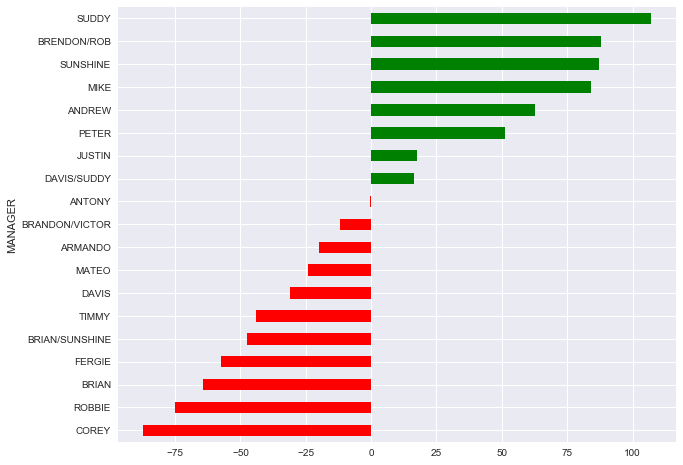

In [216]:
result = pd.DataFrame(data.groupby('MANAGER')['Pts_Against_Below_Avg'].mean()).sort_values('Pts_Against_Below_Avg')
#Plot values less than 0 as red, values greater than 0 as green
mask = (result >=0)
colors = np.array(['r']*(result.shape[0]))
colors[mask.values.flatten()] = 'g'

result['Pts_Against_Below_Avg'].plot(kind='barh', color=tuple([colors]), figsize=(10, 8));

Corey and Robbie really get boned by the points against statistic. There is some correlation in these values to other managers, as Robbie used to play me twice a year and I have scored the most league points. Suddy, Sunshine, and the infamous Rob/Cobb team are the luckiest teams on average in terms of points against.

### 3 Luckiest Points_Against_Below_Avg Seasons

In [217]:
data.sort_values('Pts_Against_Below_Avg', ascending=False)[:3]

,MANAGER,Win_Pct,WINS,LOSSES,POINTS FOR,POINTS AGAINST,PF/G,PA/G,DIFF,REGULAR SEASON FINISH,RESULT,Pts_For_Above_Avg,Pts_Against_Below_Avg,Year
2,MIKE,0.923077,12,1,1520.0,1258.6,116.923077,96.815385,20.107692,1,1st Place,62.775000,198.625000,2017
5,ANDREW,0.692308,9,4,1473.3,1380.9,113.330769,106.223077,7.107692,2,2nd Place,-39.275000,131.675000,2016
4,JUSTIN,0.538462,7,6,1536.3,1361.5,118.176923,104.730769,13.446154,5,5/6,52.283333,122.508333,2014


Last season I was the luckiest of all time, with Schoka and Justin rounding out the top 3.

### 3 Unluckiest Points_Against_Below_Avg Seasons

In [218]:
data.sort_values('Pts_Against_Below_Avg')[:3]

,MANAGER,Win_Pct,WINS,LOSSES,POINTS FOR,POINTS AGAINST,PF/G,PA/G,DIFF,REGULAR SEASON FINISH,RESULT,Pts_For_Above_Avg,Pts_Against_Below_Avg,Year
7,BRIAN,0.384615,5,8,1556.2,1701.0,119.707692,130.846154,-11.138462,9,MISSED POSTSEASON,43.625,-188.425,2016
10,COREY,0.461538,6,7,1501.3,1605.2,115.484615,123.476923,-7.992308,8,MISSED POSTSEASON,44.075,-147.975,2017
0,TIMMY,0.615385,8,5,1659.0,1623.3,127.615385,124.869231,2.746154,3,5/6,146.425,-110.725,2016


Brian, Corey, and Timmy all own one of the unluckiest seasons of all time.

### Combining Avg_Points_Against and Avg_Points_For

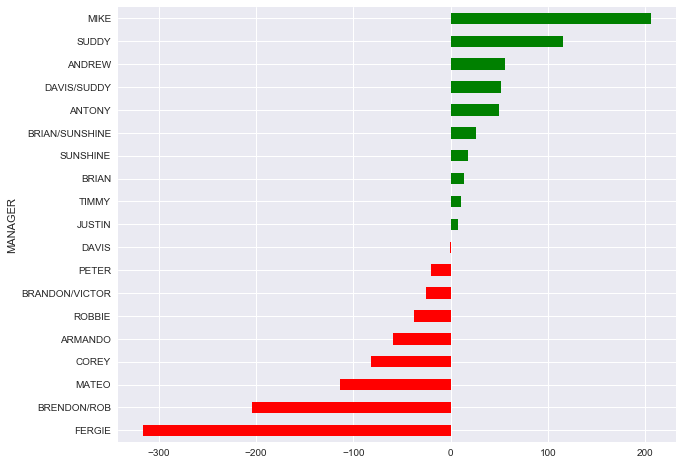

In [219]:
result = pd.DataFrame(data.groupby('MANAGER')['Pts_Against_Below_Avg', 'Pts_For_Above_Avg'].mean()).sum(axis=1).sort_values()


#Plot values less than 0 as red, values greater than 0 as green
mask = (result >=0)
colors = np.array(['r']*(result.shape[0]))
colors[mask.values.flatten()] = 'g'

result.plot(kind='barh', color=tuple([colors]), figsize=(10, 8));

This plot should correlate very strongly to Win-Loss record.

### Graphic For Regular Season To Post

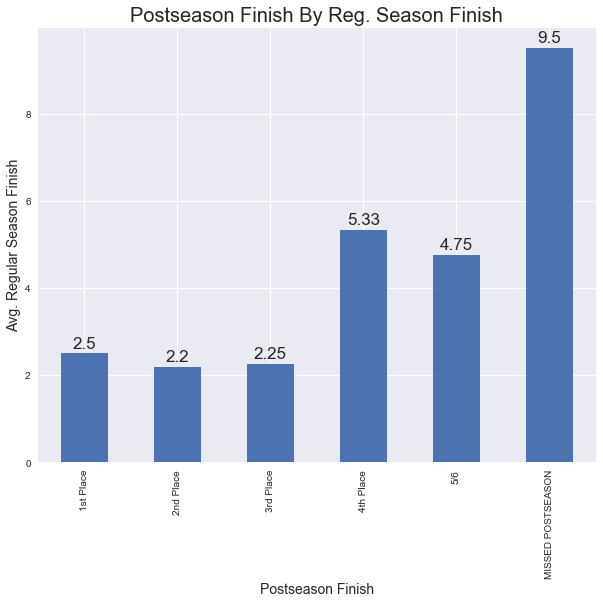

In [220]:
ax = data.groupby('RESULT')['REGULAR SEASON FINISH'].mean().plot(kind='bar', figsize=(10, 8))
for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), 
            (p.get_x()+p.get_width()/2., p.get_height()),
            ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=17)
ax.set_title('Postseason Finish By Reg. Season Finish', fontsize=20)
ax.set_ylabel('Avg. Regular Season Finish', fontsize=14)
ax.set_xlabel('Postseason Finish', fontsize=14);

### Average Win_Pct and Points For

In [221]:
avg_pts_for = np.round((data.groupby('MANAGER')['POINTS FOR'].sum() / data.groupby('MANAGER')['POINTS FOR'].count()), 2)
avg_win_pct = np.round((data.groupby('MANAGER')['Win_Pct'].sum() / data.groupby('MANAGER')['Win_Pct'].count()), 2)

df = pd.concat([avg_pts_for, avg_win_pct], axis=1)

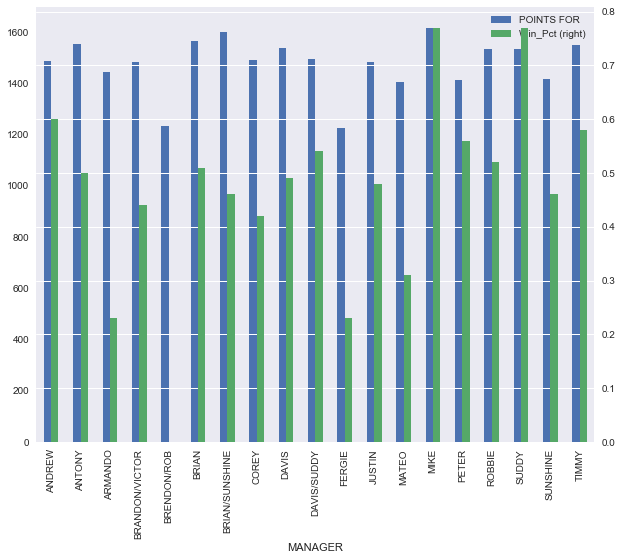

In [222]:
ax = df.plot(kind='bar', secondary_y= 'Win_Pct', figsize=(10, 8))


plt.show()

### Total Wins

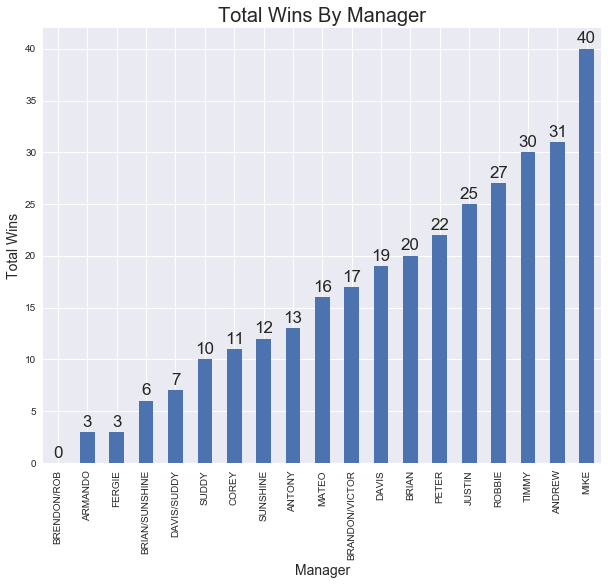

In [223]:
ax = data.groupby('MANAGER')['WINS'].sum().sort_values().plot(kind='bar', figsize=(10,8))
for p in ax.patches:
    ax.annotate((int(p.get_height())), 
            (p.get_x()+p.get_width()/2., p.get_height()),
            ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=17)
ax.set_title('Total Wins By Manager', fontsize=20)
ax.set_ylabel('Total Wins', fontsize=14)
ax.set_xlabel('Manager', fontsize=14);

### Win-Loss and Win_Pct

In [224]:
win_loss = data.groupby('MANAGER')['WINS', 'LOSSES'].sum()
table = win_loss.join(avg_win_pct).sort_values('Win_Pct', ascending=False)

In [225]:
rings = (data[data['RESULT']=='1st Place'].groupby('MANAGER')['RESULT'].count())

In [226]:
table['Rings'] = rings
table['Rings'].fillna(0, inplace=True)
table['Rings'] = table['Rings'].astype(int)

In [227]:
postseasons = (data[~data['RESULT'].isin(['MISSED POSTSEASON'])].groupby('MANAGER')['RESULT'].count())

In [228]:
table['Postseasons'] = postseasons
table['Postseasons'].fillna(0, inplace=True)
table['Postseasons'] = table['Postseasons'].astype(int)

In [229]:
table.sort_values(['Postseasons', 'Rings'], ascending=False)

,WINS,LOSSES,Win_Pct,Rings,Postseasons
MANAGER,,,,,
MIKE,40,12,0.77,2,4
TIMMY,30,22,0.58,1,4
JUSTIN,25,27,0.48,1,3
ANDREW,31,21,0.60,0,2
ROBBIE,27,25,0.52,0,2
DAVIS,19,20,0.49,0,2
SUDDY,10,3,0.77,0,1
PETER,22,17,0.56,0,1
DAVIS/SUDDY,7,6,0.54,0,1


### .500 Line W-L

In [230]:
isinstance(table,pd.DataFrame)

True

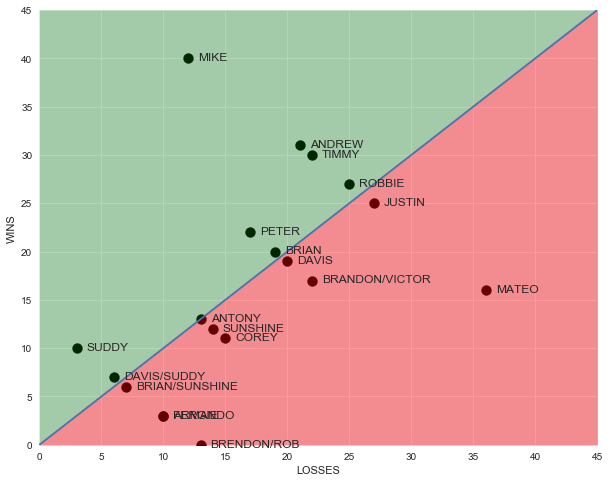

In [231]:
fig, ax = plt.subplots()

table.plot(kind='scatter', x='LOSSES', y='WINS', xlim=[0,45], ylim=[0,45], figsize=(10,8), s=100, ax=ax, color='k')
for k, v in table.iterrows():
    ax.annotate(k, v[['LOSSES', 'WINS']], xytext=(10, -2), textcoords='offset points')
plt.plot([0,45], [0,45])
ax.fill_between(range(46), range(46), alpha=.4, color='r');
ax.fill_between(range(46), y1 = range(46), y2=45, alpha=.3, color='g');

### Avg. Wins Per Year By Manager

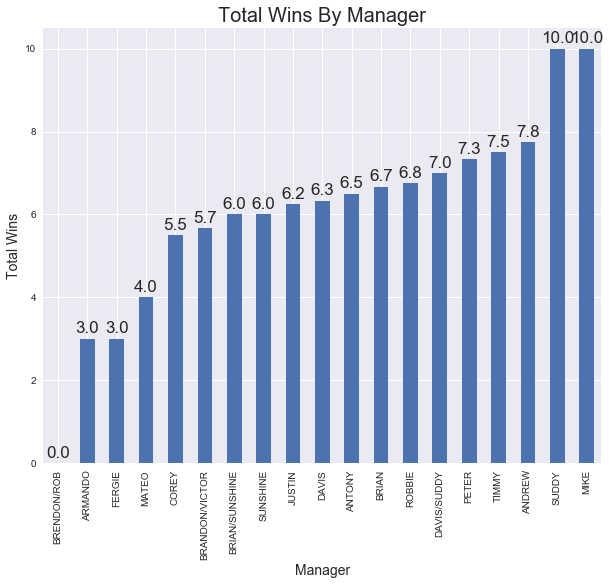

In [232]:
ax = data.groupby('MANAGER')['WINS'].mean().sort_values().plot(kind='bar', figsize=(10,8))

for p in ax.patches:
    ax.annotate((np.round(p.get_height(), 1)), 
            (p.get_x()+p.get_width()/2., p.get_height()),
            ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=17)
ax.set_title('Total Wins By Manager', fontsize=20)
ax.set_ylabel('Total Wins', fontsize=14)
ax.set_xlabel('Manager', fontsize=14);

### Pythagorean Expectation

I will use the NFL formula for Pythagorean Expectation with a slight modificaiton. I will use manager avg. pts for as PF, and league avg. pts against as PA. 

In [278]:
owners2018 = ['ANDREW', 'BRANDON/VICTOR', 'BRIAN', 'COREY', 'DAVIS/SUDDY', \
              'JUSTIN', 'MATEO', 'MIKE', 'PETER', 'ROBBIE', 'TIMMY', 'SUNSHINE']
season_2018 = data[data['MANAGER'].isin(owners2018)]

In [279]:
avg_pa = season_2018['POINTS AGAINST'].mean()
pf_df = pd.DataFrame(season_2018.groupby(['MANAGER'])['POINTS FOR'].mean())
pf_df['Pythagorean_Exp'] = 0

In [318]:
for index, row in pf_df.iterrows():
    pf = row['POINTS FOR']
    power = 15
    pf_df.loc[index, 'Pythagorean_Exp'] = (pf**power)/(pf**power + avg_pa**power)

In [319]:
pf_df['Proj Wins'] = np.round(pf_df['Pythagorean_Exp'] * 13)
pf_df['Proj Losses'] = np.round((1-pf_df['Pythagorean_Exp']) * 13)

In [320]:
pf_df['Proj Wins'].sum()

78.0

In [321]:
pf_df

,POINTS FOR,Pythagorean_Exp,Proj Wins,Proj Losses
MANAGER,,,,
ANDREW,1487.950000,0.493334,6.0,7.0
BRANDON/VICTOR,1484.133333,0.483708,6.0,7.0
BRIAN,1562.900000,0.670510,9.0,4.0
COREY,1489.850000,0.498119,6.0,7.0
DAVIS/SUDDY,1492.700000,0.505286,7.0,6.0
JUSTIN,1484.500000,0.484634,6.0,7.0
MATEO,1404.800000,0.291269,4.0,9.0
MIKE,1616.325000,0.771124,10.0,3.0
PETER,1413.800000,0.311431,4.0,9.0


In [324]:
pf_df['Pythagorean_Exp'].sort_values(ascending = False)

MANAGER
MIKE              0.771124
BRIAN             0.670510
TIMMY             0.640482
ROBBIE            0.600495
DAVIS/SUDDY       0.505286
COREY             0.498119
ANDREW            0.493334
JUSTIN            0.484634
BRANDON/VICTOR    0.483708
SUNSHINE          0.315538
PETER             0.311431
MATEO             0.291269
Name: Pythagorean_Exp, dtype: float64